# Prosper Loan Data Wrangling

### by Magon Bowling

## Preliminary Wrangling
The Prosper Loan Data was made available for download by Udacity in the course resources.  The file was manually downloaded and then uploaded to Jupyter Notebook for wrangling and analysis.  The dataset contains information regarding over 100,000 loans.

In [1]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the .csv file containing the prosper loan data
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Get an overview of the dataset and structure
df.shape

(113937, 81)

In [4]:
# First five rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of the dataset?

The loan dataset contains 113,937 rows and 81 variable columns.  The loan information provides rates, status, term length, number of lenders and more.  We will explore all the necessary information in the dataset by assessing the data, cleaning the data for visualization, and then creating appropriate visuals to illustration the information gathered.  

In [5]:
# Summary of the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What are the main features of interest in your dataset?

I am interested in the income of individuals with loans and how they are able to handle their loan payments.  I want to explore logistics of a loan that affect the amount disbursed.  I will explore the following 13 variables and look for reasons as to why loans are issued to individuals with specific incomes.  Maybe I can understand how individuals are able to handle loans based on their income and living demographics.  I will create a copy of the dataframe for use in my exploration. 

* Term
* ListingCategory
* BorrowerState
* EmploymentStatus
* EmploymentStatusDuration
* IsBorrowerHomeowner
* CreditScoreReportLower
* CreditScoreReportUpper
* DebtToIncomeRatio
* IncomeRange
* StatedMonthlyIncome
* LoanOriginalAmount
* MonthlyLoanPayment

### What features in the dataset do you think will help support your investigation into your features of interest?

I believe that a look at the value counts for term, listing category, borrower state, employment status, credit score range, and income range will give me a good sense as to who is deserving of such loans.  I will explore relationships such as: loan amounts to debt ratio, income range to credit score range, credit score range to loan amounts, debt ratio to monthly loan payments, and loan amounts to listing category.  I suspect that those with higher credit scores, higher incomes, and longer employment status will have the best debt to income ratio.  

## Assessing the Data

To begin the wrangling process, I will make a copy of the dataframe that will include the 15 columns listed above.  Next I will check for quality and tidiness issues to better prepare for visualization and analysis.  After I clean the data, I will explore the data through visualizations and explain the findings within those visualizations.  Let's get started!

In [6]:
# Create a sub-dataset from Prosper loan data which contains only the 15 stated variables
df_clean = df.copy()
df_clean = df_clean.iloc[:, np.r_[4, 16, 17, 19, 20, 21, 25, 26, 46, 47, 49, 63, 67]]

In [7]:
# View summary of sub-dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   EmploymentStatus           111682 non-null  object 
 4   EmploymentStatusDuration   106312 non-null  float64
 5   IsBorrowerHomeowner        113937 non-null  bool   
 6   CreditScoreRangeLower      113346 non-null  float64
 7   CreditScoreRangeUpper      113346 non-null  float64
 8   DebtToIncomeRatio          105383 non-null  float64
 9   IncomeRange                113937 non-null  object 
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(6), int64

In [8]:
# Check for uniqueness
df_clean.nunique()

Term                             3
ListingCategory (numeric)       21
BorrowerState                   51
EmploymentStatus                 8
EmploymentStatusDuration       605
IsBorrowerHomeowner              2
CreditScoreRangeLower           26
CreditScoreRangeUpper           26
DebtToIncomeRatio             1207
IncomeRange                      8
StatedMonthlyIncome          13502
LoanOriginalAmount            2468
MonthlyLoanPayment           23567
dtype: int64

In [9]:
# Assess more information about variables
df_clean.describe()

,Term,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,106312.000000,113346.000000,113346.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,2.774209,96.071582,685.567731,704.567731,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,3.996797,94.480605,66.458275,66.458275,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,1.000000,26.000000,660.000000,679.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,1.000000,67.000000,680.000000,699.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,3.000000,137.000000,720.000000,739.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,20.000000,755.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.00000,2251.510000


In [10]:
df_clean.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [11]:
df_clean['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [12]:
df_clean['BorrowerState'].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [13]:
df_clean['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [14]:
df_clean['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [15]:
df_clean['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
sum(df_clean.duplicated())

874

## Cleaning the Data

**Quality Issues:**
1. Name of the column `ListingCategory (numeric)` includes a space.
2. Data type of the `Term` column is integer, not ordinal categorical variable.
3. Data type of the `ListingCategory (numeric)` column is integer, not nominal categorical.
4. The `EmploymentStatus` column includes two categories which may indicate the same status of employment: Not available and NaN.
5. There are 871 duplicate rows of data in the df_clean dataframe.
6. 11 of the 16 features in the dataframe object df_clean include multiple NaN values.
7. Data types for columns `EmploymentStatusDuration`, `CreditScoreRangeLower`, and `CreditScoreRangeUpper` are floats, not integers.
8. Values under the `StatedMonthlyIncome` column have more than two digits after the decimal although the column represents a monetary amount.
9. Data type of the `LoanOriginalAmount` column, which represents a monetary amount, is an integer, not float. 

**Tidiness Issue:**
1. Range of each borrower's credit score is split into two columns for lower and upper boundaries, instead of a range.

### Quality Issue 1
*The name for column `ListingCategory (numeric)` includes a space.*

**Define:** Change the name of the column to `ListingCategory`.

**Code**

In [17]:
# Change column name
df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

**Test**

In [18]:
# Confirm the change in name
df_clean.columns

Index(['Term', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment'],
      dtype='object')

### Quality Issue 2
*Data type of the `Term` column is integer, not ordinal categorical variable.*

**Define:** Convert the data type from integer to ordinal category.

**Code**

In [19]:
# Ordered list of unique values in Term
terms = list(df_clean.Term.unique())
terms.sort()

# Convert data type to ordinal category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df_clean.Term = df_clean.Term.astype(loan_terms)

**Test**

In [20]:
# Confirm the change in data type
df_clean.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

### Quality Issue 3
*Data type of the `ListingCategory` column is integer, not nominal categorical variable.*

**Define:** Convert the data type from integer to nominal category.

**Code**

In [21]:
# Ordered list of unique values in ListingCategory
categories = list(df_clean.ListingCategory.unique())
categories.sort()

# Convert data type to nominal category
list_categories = pd.api.types.CategoricalDtype(categories = categories)
df_clean.ListingCategory = df_clean.ListingCategory.astype(list_categories)

**Test**

In [22]:
# Confirm the change in data type
df_clean.ListingCategory.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20],
                 ordered=False)

### Quality Issue 4
*The `EmploymentStatus` column includes two categories which may indicate the same status of employment: Not available and NaN.*

**Define:** Change all 'Not Available' to NaN.

**Code**

In [23]:
# Total number of instances of 'Not available' for EmploymentStatus
count_status_before = df_clean.query('EmploymentStatus == "Not available"').shape[0]
count_nan_before = df_clean.EmploymentStatus.isna().sum()

print(count_status_before)
print(count_nan_before)

5347
2255


In [24]:
# Replace 'Not available' with NaN
df_clean.EmploymentStatus.replace(to_replace = 'Not available', value = np.nan, inplace = True)

**Test**

In [25]:
# Verify all 'Not available' are replaced with NaN
count_status_after = df_clean.query('EmploymentStatus == "Not available"').shape[0]
count_nan_replaced = df_clean.EmploymentStatus.isna().sum() - count_nan_before

print(count_status_before)
print(count_status_after)
print(count_nan_replaced)

5347
0
5347


### Quality Issue 5
*There are 871 duplicate rows of data in the df_clean dataframe.*

**Define:** Remove all duplicated rows from the dataframe.

**Code**

In [26]:
# Remove all duplicate rows
df_clean.drop_duplicates(inplace=True)

**Test**

In [27]:
# Confirm there are no duplicate rows
df_clean.duplicated().sum()

0

### Quality Issue 6
*11 of the 16 features in the dataframe object df_clean include multiple NaN values.*

**Define:** Remove the rows that include at least one NaN.

**Code**

In [28]:
# Drop all rows with NaN
df_clean.dropna(inplace=True)

**Test**

In [29]:
# Confirm all rows have non-NaN values
df_clean.isnull().sum()

Term                        0
ListingCategory             0
BorrowerState               0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
CreditScoreRangeLower       0
CreditScoreRangeUpper       0
DebtToIncomeRatio           0
IncomeRange                 0
StatedMonthlyIncome         0
LoanOriginalAmount          0
MonthlyLoanPayment          0
dtype: int64

In [30]:
# Reset index to have indices increase from 0 by 1
df_clean.reset_index(drop=True, inplace=True)

### Quality Issue 7
*Data types for columns `EmploymentStatusDuration`, `CreditScoreRangeLower`, and `CreditScoreRangeUpper` are floats, not integers.*

**Define:** Convert the data types from floats to integers.

**Code & Test**

In [31]:
# List of the columns that need to be converted 
column_list = ['EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']

# Change the data type from float to integer
for column in column_list:
    df_clean[column] = df_clean[column].astype(dtype = 'int')
    
    # Confirm that the change in data type
    print(column, df_clean[column].dtype)

EmploymentStatusDuration int32
CreditScoreRangeLower int32
CreditScoreRangeUpper int32


### Quality Issue 8
*Values under the `StatedMonthlyIncome` column have more than two digits after the decimal although the column represents a monetary amount.*

**Define:** Round the values in the `StatedMonthlyIncome` column to two decimal places.

**Code**

In [32]:
# Round floats to two decimal places
df_clean.StatedMonthlyIncome = df_clean.StatedMonthlyIncome.round(decimals = 2)

**Test**

In [33]:
# Confirm dollar amounts are rounded to two decimal places with a sample
df_clean.StatedMonthlyIncome.sample(10)

30795     4125.00
44008     2416.67
73386    21666.67
30596     6833.33
28237     2750.00
70663    10000.00
53422     2916.67
72601     2729.17
35265     2500.00
86597     7527.08
Name: StatedMonthlyIncome, dtype: float64

### Quality Issue 9
*Data type of the `LoanOriginalAmount` column, which represents a monetary amount, is an integer, not float.*

**Define:** Convert data type from integer to float.

**Code**

In [34]:
# Convert data type to float
df_clean.LoanOriginalAmount = df_clean.LoanOriginalAmount.astype(dtype = 'float')

**Test**

In [35]:
# Confirm data type has changed
df_clean.LoanOriginalAmount.dtype

dtype('float64')

### Tidiness Issue 1
*Range of each borrower's credit score is split into two columns for lower and upper boundaries, instead of a range.*

**Define:** 
* Create a new column `CreditScoreRange` from existing columns.  
* Change the data type in `CreditScoreRange` to ordinal categories.
* Drop the two columns `CreditScoreRangeLower` and `CreditScoreRangeUpper`.

**Code**

In [36]:
columns = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']

# Convert data types of existing columns from integer to string for join operation
for column in columns:
    df_clean[column] = df_clean[column].astype(dtype = 'str')

# Join the two boundaries with -
df_clean['CreditScoreRange'] = df_clean[columns].apply(lambda x: '-'.join(x), axis=1)

# Ordered list of unique values in CreditScoreRange
ranges = list(df_clean.CreditScoreRange.unique())
ranges.sort()

# Convert data type to ordinal category
creditscore_ranges = pd.api.types.CategoricalDtype(ordered=True, categories = ranges)
df_clean.CreditScoreRange = df_clean.CreditScoreRange.astype(creditscore_ranges)

# Drop CreditScoreRangeLower and CreditScoreRangeUpper columns
df_clean.drop(columns = columns, inplace=True)

**Test**

In [37]:
# Confirm the changes in columns
df_clean.columns

Index(['Term', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'CreditScoreRange'],
      dtype='object')

In [38]:
# Verify data type for the ranges
df_clean.CreditScoreRange.dtype

CategoricalDtype(categories=['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899'],
                 ordered=True)

In [77]:
# Save dataframe
df_clean.to_csv('prosperLoanData_clean.csv', index = False)

## Univariate Exploration

I will start by looking at the information regarding the number of loans in each term category (i.e., 12 month, 36 month, and 60 month term loans as described in the __[Prosper Loan Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__).

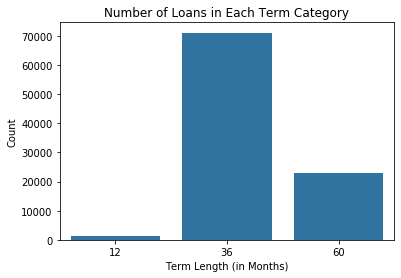

In [39]:
# Create a base color for the charts
base_color = sb.color_palette()[0]

# Create count plot for term categories
sb.countplot(data = df_clean, x = 'Term', color = base_color)
plt.xlabel('Term Length (in Months)')
plt.ylabel('Count')
plt.title('Number of Loans in Each Term Category');

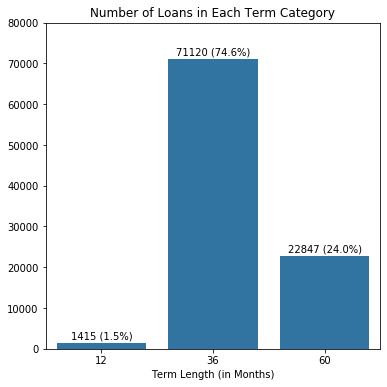

In [40]:
# Modify the count plot of each term to show the percentage of loans within each term
plt.figure(figsize = [6,6])
sb.countplot(data = df_clean, x = 'Term', color = base_color)
plt.xlabel('Term Length (in Months)')
plt.ylabel('')
plt.ylim(0, 80000)
plt.title('Number of Loans in Each Term Category')

# Retrieve locations and labels of xticks
locs, labels = plt.xticks()

# Total count and counts for each term
total_count = df_clean.shape[0]
term_counts = df_clean.Term.value_counts()

for loc, label in zip(locs, labels):
    # Number of loans per term as integer
    term_count = term_counts[int(label.get_text())]
    
    # Calculate the proportion of each term as percentage
    term_proportion = '{} ({:0.1f}%)'.format(term_count, 100*term_count/total_count)
    
    # Place proportion of the term on the top of the bars
    plt.text(x = loc, y = term_count + 1000, s = term_proportion, ha = 'center', color = 'black', fontsize = 10);

74.6% of the loans issued are 3 year loans, 24% are 5 year loans, and 1.5% are 1 year loans.  This leads me to wonder what type of loans are being awarded.  Next I will explore `ListingCategory` and the counts per category.

In [41]:
# Get listing category count
df_clean['ListingCategory'].value_counts()

1     53984
7      9484
0      7484
2      6915
3      5173
6      2356
4      2259
13     1778
15     1390
14      794
18      785
20      723
19      718
5       604
16      289
11      198
8       188
9        83
10       82
17       50
12       45
Name: ListingCategory, dtype: int64

In [42]:
# Mapping from number to category name
category_dict = {0:'N/A', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use'
              , 6:'Auto', 7:'Other', 8:'Baby, Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring'
              , 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle'
              , 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

# Function to apply
def category_name(listing):
    if listing['ListingCategory'] in category_dict.keys():
        category = category_dict[listing['ListingCategory']]
        return category
    else:
        return listing['ListingCategory']
    
df_clean['ListingCategory'] = df_clean.apply(category_name, axis = 1)

In [43]:
cat_counts = df_clean['ListingCategory'].value_counts()
print(cat_counts)

Debt Consolidation    53984
Other                  9484
N/A                    7484
Home Improvement       6915
Business               5173
Auto                   2356
Personal Loan          2259
Household Expenses     1778
Medical/Dental         1390
Large Purchases         794
Taxes                   785
Wedding Loans           723
Vacation                718
Student Use             604
Motorcycle              289
Engagement Ring         198
Baby, Adoption          188
Boat                     83
Cosmetic Procedure       82
RV                       50
Green Loans              45
Name: ListingCategory, dtype: int64


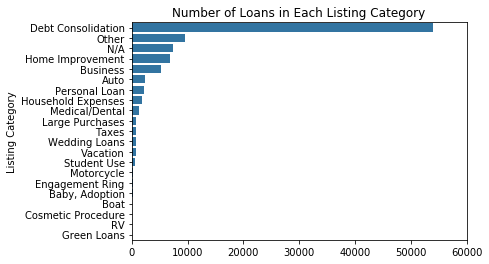

In [44]:
# Create a horizontal count plot
cat_order = df_clean['ListingCategory'].value_counts().index
sb.countplot(data = df_clean, y = 'ListingCategory', color = base_color, order = cat_order)
plt.xlabel('')
plt.xlim(0, 60000)
plt.ylabel('Listing Category')
plt.title('Number of Loans in Each Listing Category');

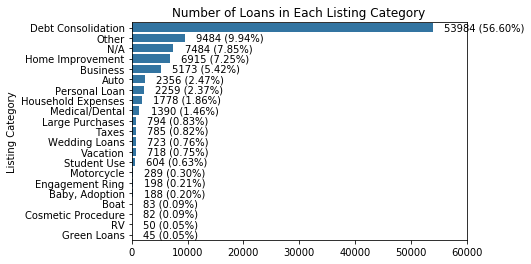

In [45]:
# Modify the horizontal count plot to include category counts and percentages
plt.figure(figsize = [6,4])
sb.countplot(data = df_clean, y = 'ListingCategory', color = base_color, order = cat_order)
plt.xlabel('')
plt.xlim(0, 60000)
plt.ylabel('Listing Category')
plt.title('Number of Loans in Each Listing Category');

# Add notation
total = df_clean.shape[0]
locs, labels = plt.yticks()

# Loop throug each pair of location and ticks
for loc, label in zip(locs, labels):
    # Get text property for label to get currect count
    cat_count = cat_counts[label.get_text()]
    cat_proportion = '{} ({:0.2f}%)'.format(cat_count, 100*cat_count / total)
    # Print the annoation to the right of bar
    plt.text(y = loc, x = cat_count + 2000, s = cat_proportion, va = 'center', color = 'black')

In this count plot, we see that the majority of loans is for debt consolidation followed by unknown listings.  This gives me a perceptive that individuals are trying to manage their debt consumption.  There is a significantly higher amount of loans in the debt consolidation category which also makes me wonder if this particular data base is well known for such allocations.  This knowledge leads me to want to look into the counts of homeowner status, income range and credit score range.  I also want to look into histograms of employment durations, debt to income ratios, monthly incomes and loan amounts.

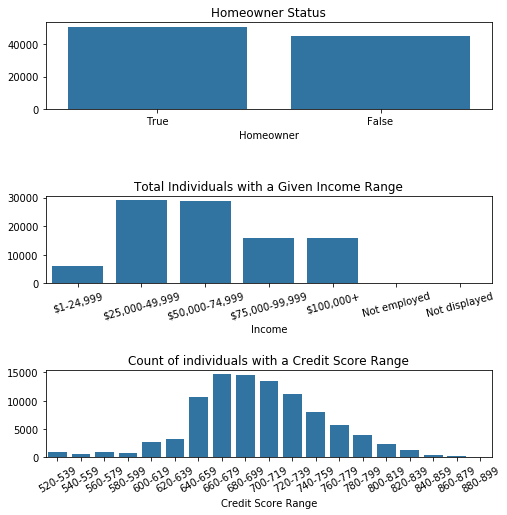

In [46]:
# Modify the features of the subplots for readability
plt.figure(figsize = [8,8])
plt.subplots_adjust(hspace = 1)

plt.subplot(3,1,1)
home_order = df_clean['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df_clean, x = 'IsBorrowerHomeowner', color = base_color, order = home_order)
plt.xlabel('Homeowner')
plt.ylabel('')
plt.title('Homeowner Status');

plt.subplot(3,1,2)
inrange_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
sb.countplot(data = df_clean, x = 'IncomeRange', color = base_color, order = inrange_order)
plt.xlabel('Income')
plt.xticks(rotation = 15)
plt.ylabel('')
plt.title('Total Individuals with a Given Income Range');

plt.subplot(3,1,3)
csrange_order = ['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899']
sb.countplot(data = df_clean, x = 'CreditScoreRange', color = base_color, order = csrange_order)
plt.xlabel('Credit Score Range')
plt.ylabel('')
plt.title('Count of individuals with a Credit Score Range')
plt.xticks(rotation = 30);

From this information, we can see that slightly more individuals receiving loans are homeowners.  The majority of individuals falling within the income range of `$25,000-49,999` and `$50,000-74,999`.  We also see a somewhat normal distribution of credit score ranges.

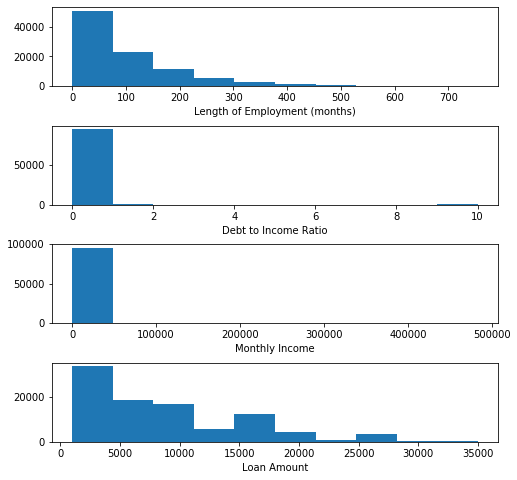

In [47]:
# Create subplots of histograms for 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'StatedMonthlyIncome' and 'LoanOriginalAmount'  
plt.figure(figsize = [8,8])
plt.subplots_adjust(hspace = 0.5)

plt.subplot(4,1,1)
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', color = base_color)
plt.xlabel('Length of Employment (months)')
plt.ylabel('');

plt.subplot(4,1,2)
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', color = base_color)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('');

plt.subplot(4,1,3)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', color = base_color)
plt.xlabel('Monthly Income')
plt.ylabel('');

plt.subplot(4,1,4)
plt.hist(data = df_clean, x = 'LoanOriginalAmount', color = base_color)
plt.xlabel('Loan Amount')
plt.ylabel('');

The above histograms warrant further individual investigation with smaller bin sizes.  I will take a look at each on in turn, starting with employment status duration, then stated monthly income, followed by original loan amount, and lastly debt to income ratio.

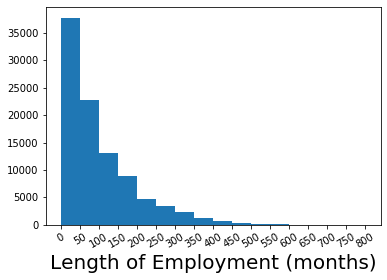

In [48]:
# Histogram for employment status duration
bins = np.arange(0, df_clean['EmploymentStatusDuration'].max()+50, 50)
labels = ['{}'.format(val) for val in bins]
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Length of Employment (months)', size = 20)
plt.xticks(bins, labels, rotation = 30)
plt.ylabel('');

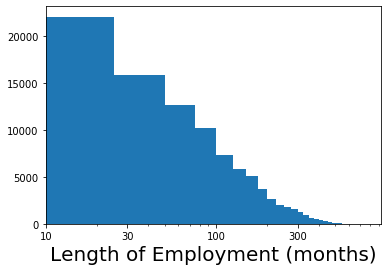

In [49]:
# Explore the length of employment chart above with a log scale
bins = np.arange(0, df_clean['EmploymentStatusDuration'].max()+25, 25)
ticks = [10, 30, 100, 300]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Length of Employment (months)', size = 20)
plt.ylabel('');

Regardless of using the log scale or evenly distributed bins, I think that we can clearly see that the majority of individuals have a short employment status duration that progressively decreases with time.  

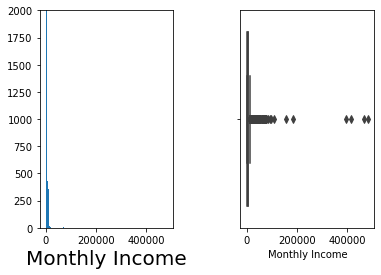

In [50]:
# Histogram and box plot for stated monthly income
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,2,1)
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+100, 100)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income', size = 20)
plt.ylabel('')
plt.ylim(0, 2000);

plt.subplot(1,2,2)
sb.boxplot(data = df_clean, x = 'StatedMonthlyIncome')
plt.xlabel('Monthly Income', size = 10);

I am going to remove the outliers from this view to get a closer look at the majority of the values.  I think I will have a domain from 0 to 100K.

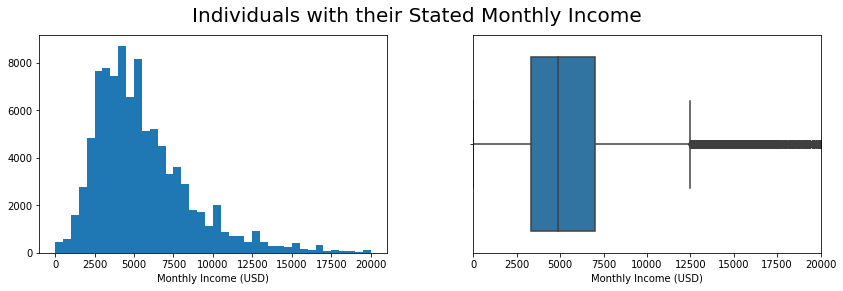

In [51]:
# Modify the plots for the stated monthly income data
plt.figure(figsize = [14,4])
plt.subplots_adjust(wspace = 0.25)

plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count');
plt.subplot(1,2,1)
bins = np.arange(0, 20000+500, 500)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)

plt.xlabel('Monthly Income (USD)', size = 10)
plt.ylabel('')
plt.suptitle('Individuals with their Stated Monthly Income', size = 20);

plt.subplot(1,2,2)
sb.boxplot(data = df_clean, x = 'StatedMonthlyIncome')
plt.xlabel('Monthly Income (USD)', size = 10)
plt.xlim(0,20000);

We can clearly see that the majority of stated monthly incomes fall in less than about 20K.  If we need a closer look at the box of the whisker plot, then we can shorten the domain to about 15K.  

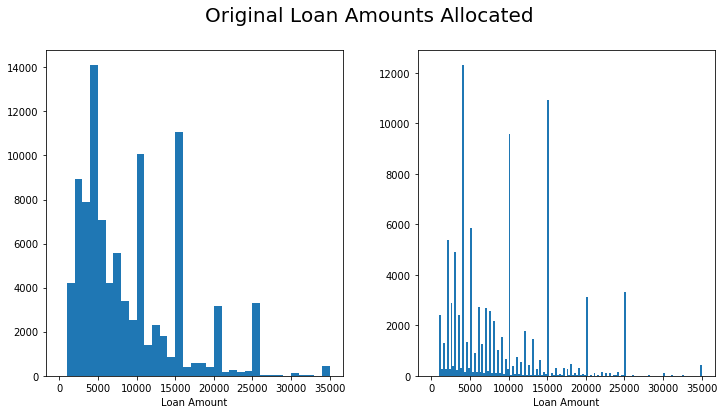

In [52]:
# Histogram for original loan amount with fewer bins and more bins comparison
plt.figure(figsize = [12,6])
plt.subplots_adjust(wspace = 0.25)

plt.subplot(1,2,1)
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('')
plt.suptitle('Original Loan Amounts Allocated', size = 20);

plt.subplot(1,2,2)
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+250, 250)
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('');

The comparison of using two different bin sizes gives an indication that there are monies lent with varying sums.  However, we see a spike in the amount of 4K, 10K, and 15K.  Interesting amounts!

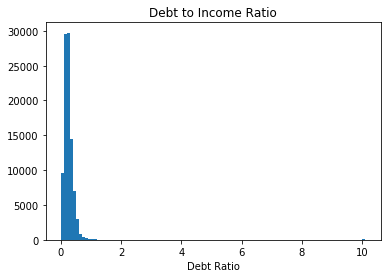

In [53]:
# Histogram for debt to income ratio
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+0.1, 0.1)
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt Ratio')
plt.ylabel('')
plt.title('Debt to Income Ratio', size = 12);

In [54]:
# Number of individuals with a debt to income ratio greater than 1.00 
np.sum(df_clean['DebtToIncomeRatio'] > 1)

605

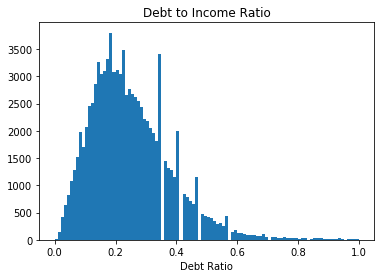

In [55]:
# Remove the outlier of 10.01
bins = np.arange(0, 1+0.01, 0.01)
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt Ratio')
plt.ylabel('')
plt.title('Debt to Income Ratio', size = 12);

The distribution of the Debt to Income Ratio data is right-skewed with the mean greater than the median.  I think it is promising that the majority of individuals with debt have a ratio between 0.0 and 0.4.  However, there are 605 individuals that have a higher debt than income.  Now I am anxious to take a look at relationships between two variables; such as: debt to income ratio compared to stated monthly income, stated monthly income compared to loan amounts, loan categories compared to loan amounts, and more.  Before I get to bivariate exploration, here are my findings from univariate exploration.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

I discovered in my findings that the three year term loans are the most popular.  The Debt Consolidation category was abundantly more popular than any other loan listing category.  Employment status durations were greatest during the shorter time length and progressively decreased over time.  I did try a log scale for the employment durations.  Both charts reflected the same conclusion.  I was not surprised that there were slightly more homeowners who borrowed, but I was surprised that credit ranges were quite normally distributed.  I wanted to visualize stated monthly incomes in both the histogram and box plot.  The majority of amounts was within `$3200` and `$6800`.  The distribution for stated monthly income was right-skewed, as well as the debt to income ratio histogram.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The majority of my changes to the data was performed before the visualization process.  I was glad that I cleaned the data before I began exploration of variables for the practice and to have quality and tidiness I could work with.  As I explored the variables above, I would adjust bin sizes and windows to clean up the unusual distributions.  For instance, as I explored Debt to Income Ratios I saw a right-skewed distribution after I focused in on the ratios less than 1.  I found right-skewed distributions in the plots containing Stated Monthly Income and Employment Status Duration.

## Bivariate Exploration

I will now take a look at relationships between variables.  I will look at the pairwise correlations present between features in the data.  I will sort my variables into numerical and categorical and use heat maps and pairgrids to begin with.

In [56]:
# Variable categories
cat_vars = ['Term', 'ListingCategory', 'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'CreditScoreRange']
num_vars = ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

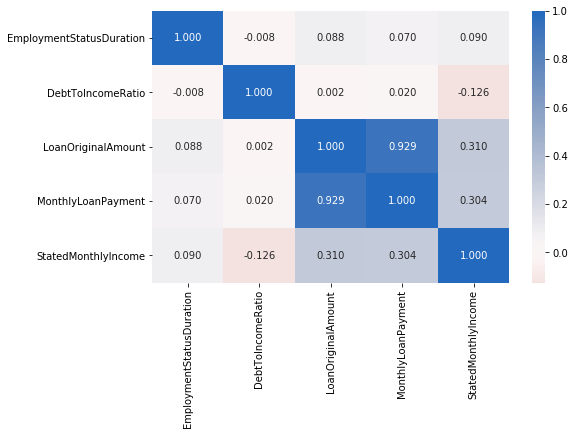

In [57]:
# Correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(df_clean[num_vars].corr(), annot=True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

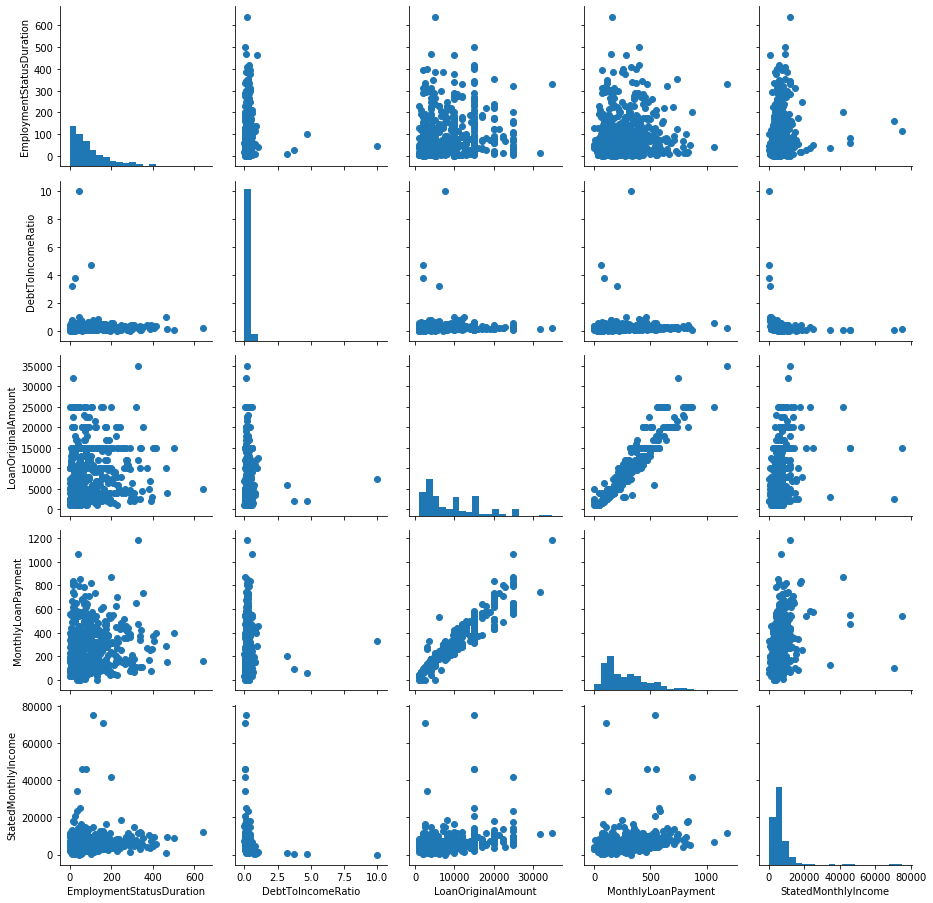

In [58]:
# Plot matrix: sample 500
sample = np.random.choice(df_clean.shape[0], 500, replace=False)
df_sample = df_clean.loc[sample,:]

g = sb.PairGrid(data = df_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

It is not surprising to see a positive linear correlation between loan amount and monthly loan payment.  Likewise, it is not a surprise to see clusters in the debt to income ratio plots.  I am surprised that there is not a stronger correlation between monthly income and employment duration.  I would hope there would be a stronger correleation between loan amounts and payments with regards to monthly income as well.  The weakest correlations, or the correlation coefficient closest to zero, are those with regards to employment duration and loan amounts or payments.  

I would like to move on to comparing categorical features with numerical features.  I will begin with comparing the categorical variables with original loan amounts, followed by loan payments.

C:\Users\bowld\Documents\Udacity\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


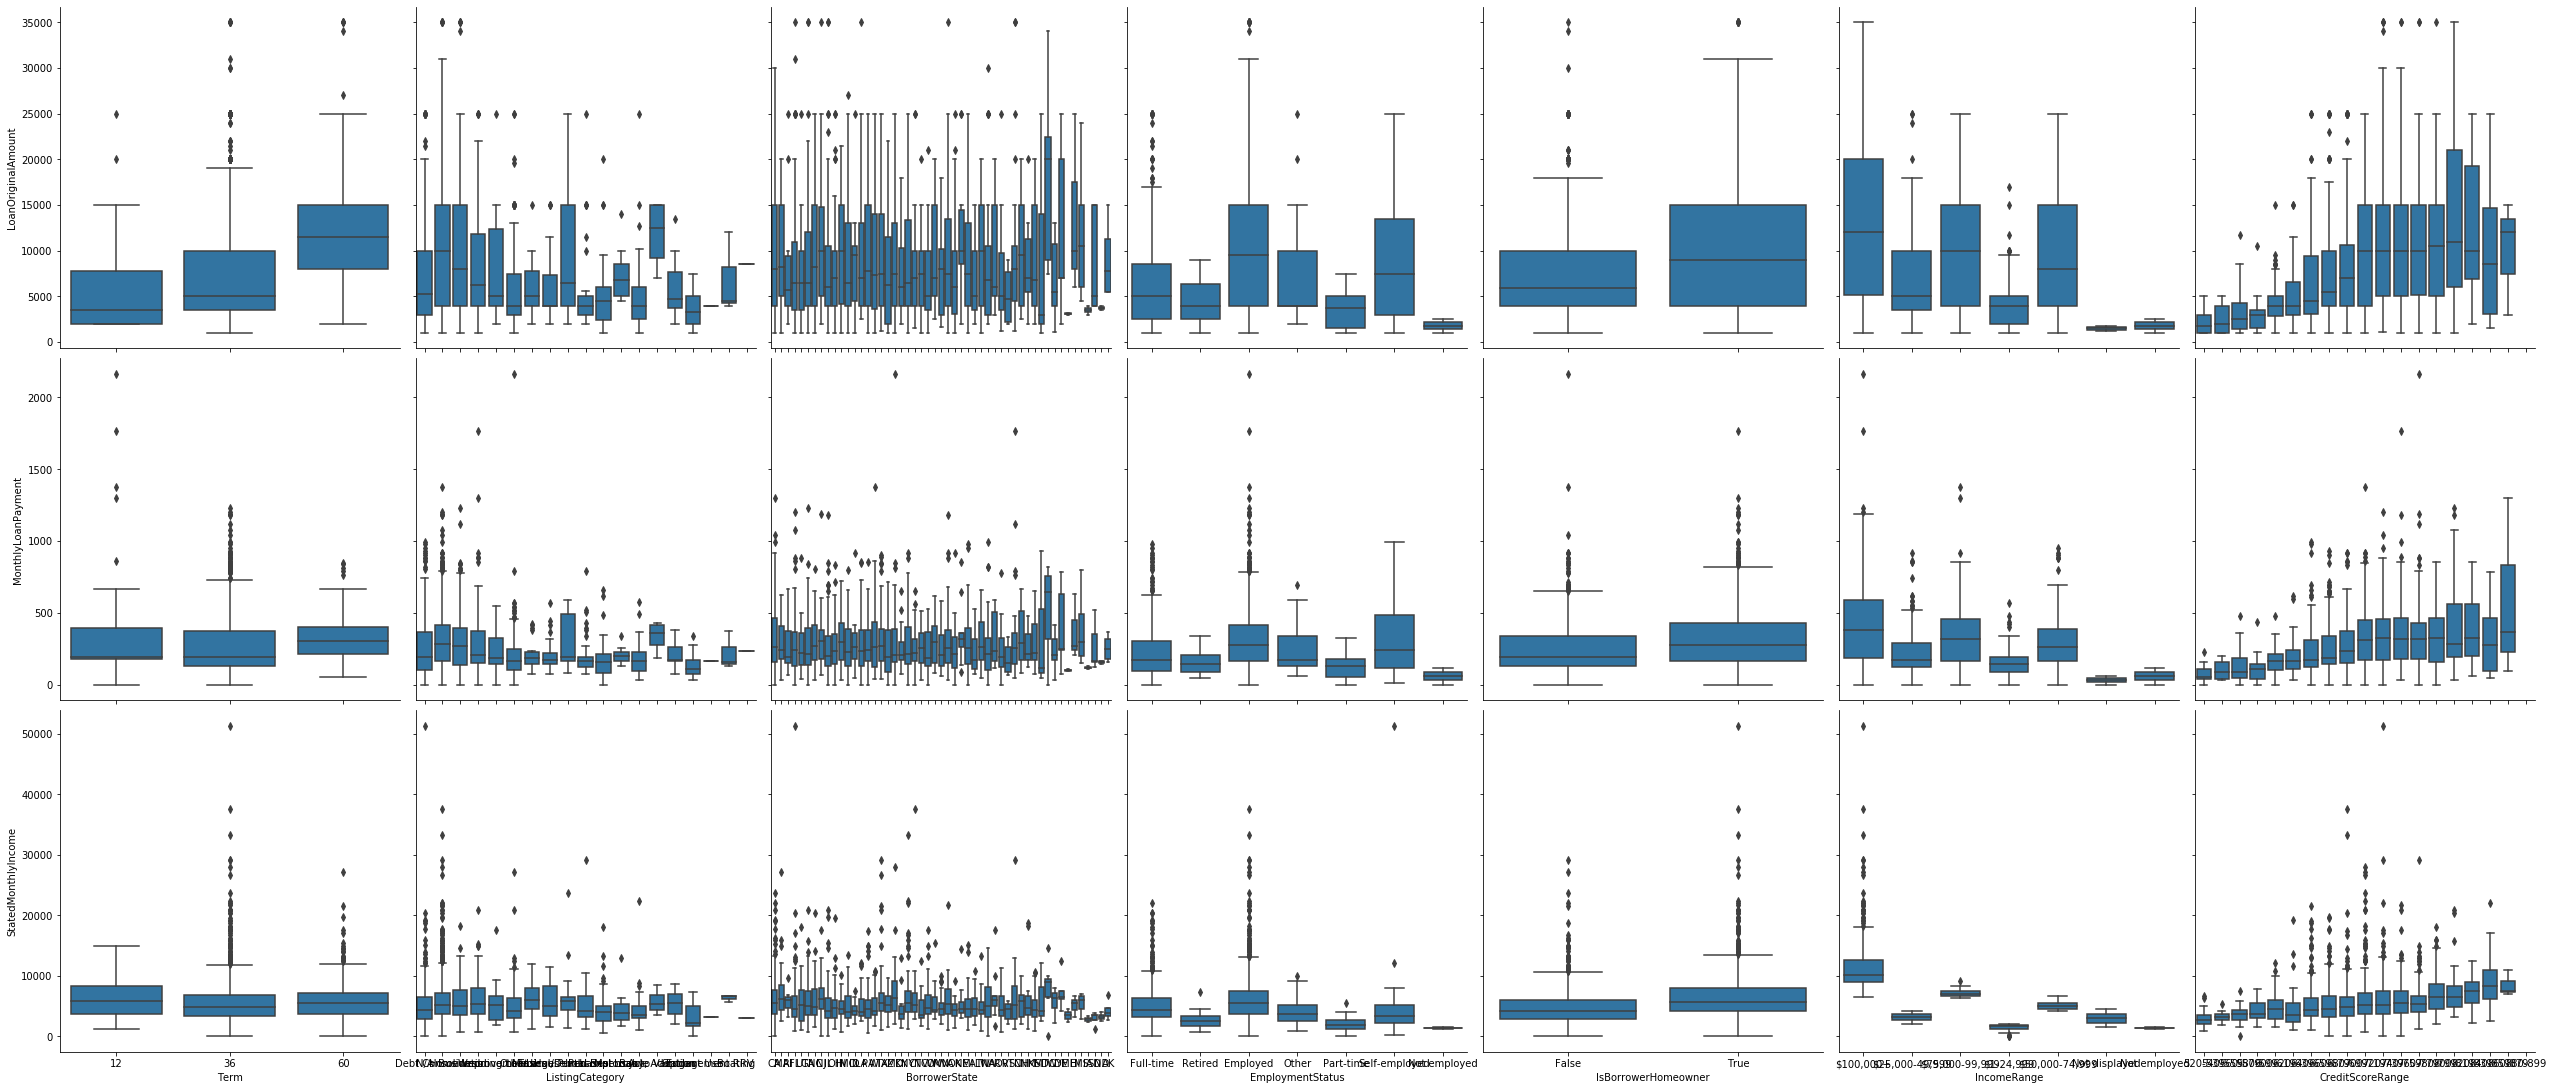

In [59]:
# Plot matrix of loan amounts, monthly loan payments and stated monthly incomes against categorical features
sample = np.random.choice(df_clean.shape[0], 2000, replace=False)
df_sample = df_clean.loc[sample,:]

def boxgrid(x, y, **kwargs):
    # Got this idea from the example from course
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)
    

g = sb.PairGrid(data = df_sample, y_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome'], x_vars = cat_vars, size = 5, aspect = 1)
g.map(boxgrid)
plt.show();


It makes sense that shorter term loans have smaller loan amounts and monthly loan payments.  It also makes sense that lower credit score ranges would have smaller loan amounts and monthly loan payments.  There appears to be a fairly consistent distribution among the many different states with the exception of a few in regards to loan amounts and payments.  What is really diverse is the loan amounts and payments given listing categories.  I would like to explore this in further detail.  It also makes sense that home owners would have greater loan amounts and monthly loan payments.  This is supported by the homeowners and stated monthly incomes.  A higher income is found more likely with homeowners maybe due to more consistency in employment.  Homeowners are possibly more likely to have longer employment status durations.  I would like to explore that as well.

There appears to be less of a diversity with credit score ranges and stated monthly incomes.  I would like to look into that more.  Finally, I would like to explore more information within the states.  Maybe this will be telling about economy or society expectations or practices within each state.

Before I dive into deeper exploration, I want to take a look at employment status duration with income ranges and credit score ranges; as well as debt to income ratios with borrower states.

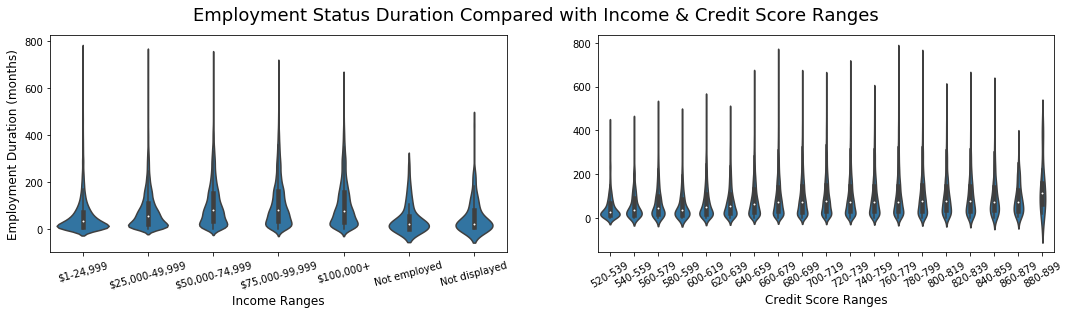

In [79]:
# Create violin plots for income ranges and credit score ranges compared to employment status duration
plt.figure(figsize = [18,4])

plt.subplot(1,2,1)
inrange_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
sb.violinplot(data = df_clean, x = 'IncomeRange', y = 'EmploymentStatusDuration', color = base_color, order = inrange_order)
plt.xlabel('Income Ranges', size = 12)
plt.xticks(rotation = 15)
plt.ylabel('Employment Duration (months)', size = 12)
plt.suptitle('Employment Status Duration Compared with Income & Credit Score Ranges', size = 18);

plt.subplot(1,2,2)
sb.violinplot(data = df_clean, x = 'CreditScoreRange', y = 'EmploymentStatusDuration', color = base_color)
plt.xlabel('Credit Score Ranges', size = 12)
plt.xticks(rotation = 30)
plt.ylabel('');

Interestingly there is a bell shape to all the different ranges.  This makes sense knowing that very few employees remain in their positions for very long.  

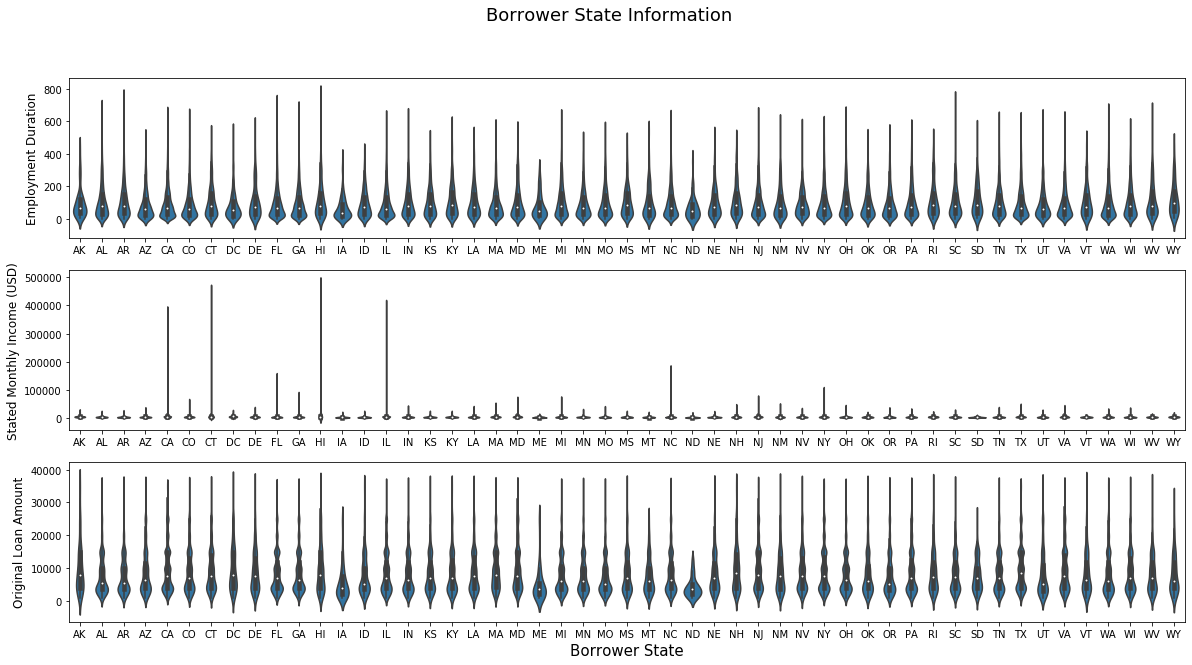

In [61]:
# Compare employment status duration, monthly income and loan original amounts to borrower states
plt.figure(figsize = [20,10])

plt.subplot(3,1,1)
state_order = df_clean.groupby('BorrowerState').count().index
sb.violinplot(data = df_clean, x = 'BorrowerState', y = 'EmploymentStatusDuration', color = base_color, order = state_order)
plt.xlabel('')
plt.ylabel('Employment Duration', size = 12)
plt.suptitle('Borrower State Information', size = 18);

plt.subplot(3,1,2)
sb.violinplot(data = df_clean, x = 'BorrowerState', y = 'StatedMonthlyIncome', color = base_color, order = state_order)
plt.xlabel('')
plt.ylabel('Stated Monthly Income (USD)', size = 12);

plt.subplot(3,1,3)
sb.violinplot(data = df_clean, x = 'BorrowerState', y = 'LoanOriginalAmount', color = base_color, order = state_order)
plt.xlabel('Borrower State', size = 15)
plt.ylabel('Original Loan Amount', size = 12);

The top states with employment status durations are AR, HI, and SC.  Stated Monthly Incomes were drastically different for CA, CT, HI, and IL with NC and FL coming in next.  Original loan amounts are widely consistent across the states with the exception of IA, ME, MT, ND, and SD.  

Now I would like to take a deeper look at loan amounts within listing categories.  I want to see what categories have higher loans.

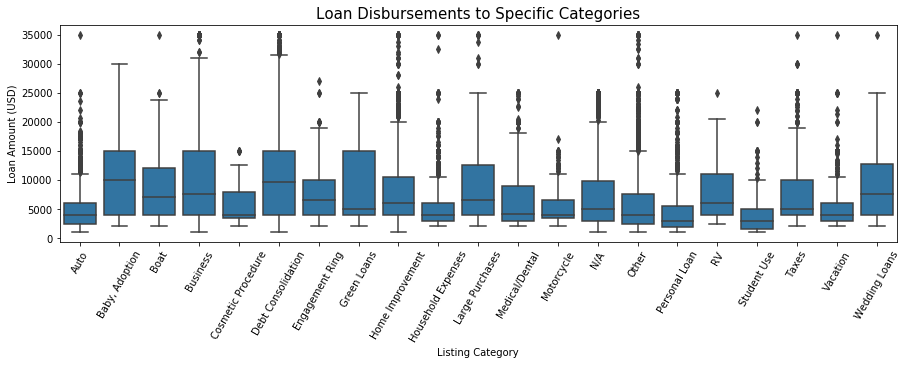

In [62]:
# Create a box plot for loan original amounts and listing categories
plt.figure(figsize = [15,4])
list_order = df_clean.groupby('ListingCategory').count().index
sb.boxplot(data = df_clean, x = 'ListingCategory', y = 'LoanOriginalAmount', color = base_color, order = list_order)
plt.xlabel('Listing Category')
plt.xticks(rotation = 60)
plt.ylabel('Loan Amount (USD)')
plt.title('Loan Disbursements to Specific Categories', size = 15);

It is interesting to see what listing categories have smaller ranges or larger ranges.  It is also interesting the numerous outliers in the data.  

The last box plot I would like to see before I move onto scatter plots is homeowners compared to employment durations.

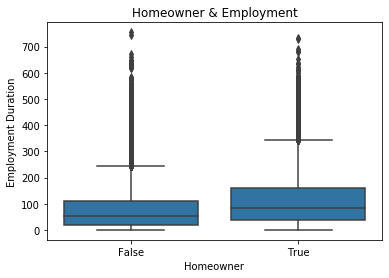

In [63]:
# Create a box plot for homeowners and employment duration
sb.boxplot(data = df_clean, x = 'IsBorrowerHomeowner', y = 'EmploymentStatusDuration', color = base_color)
plt.xlabel('Homeowner')
plt.ylabel('Employment Duration')
plt.title('Homeowner & Employment');

Just as I suspected, homeowners have more consistency with styaing with employment longer.

Now I would like to compare categorical features.  I want to take a look at homeowners compared to term, listing categories, employment status, income range and credit score range.

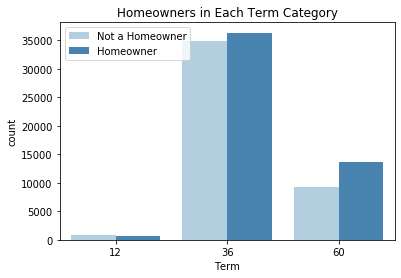

In [64]:
# Compare homeowner status in term loans
sb.countplot(data = df_clean, x = 'Term', hue = 'IsBorrowerHomeowner', palette = 'Blues')
l = plt.legend(loc = 2)
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.title('Homeowners in Each Term Category');

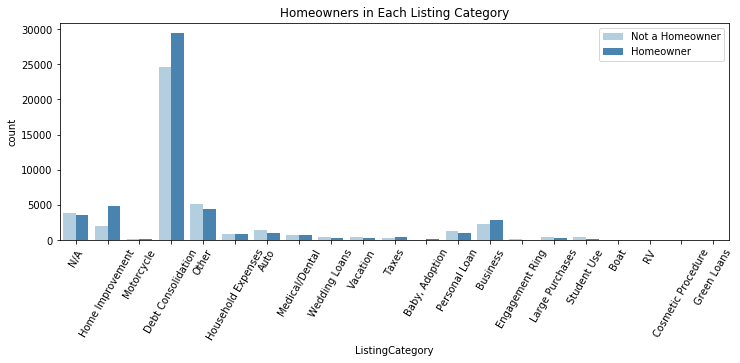

In [65]:
# Compare homeowner status in listing categories
plt.figure(figsize = [12,4])
sb.countplot(data = df_clean, x = 'ListingCategory', hue = 'IsBorrowerHomeowner', palette = 'Blues')
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Listing Category');

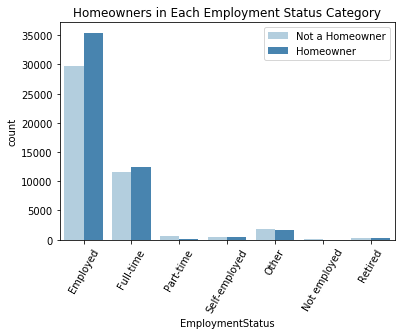

In [66]:
# Compare homeowner status to employment status
employ_order = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired']
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = employ_order)
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Employment Status Category');

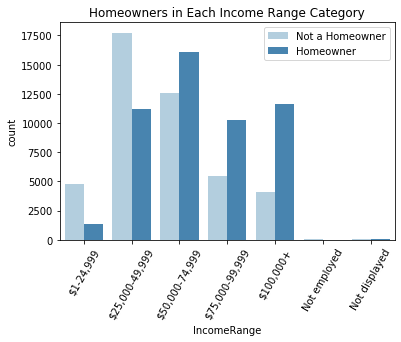

In [67]:
# Compare homeowner status to income range
sb.countplot(data = df_clean, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = inrange_order)
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Income Range Category');

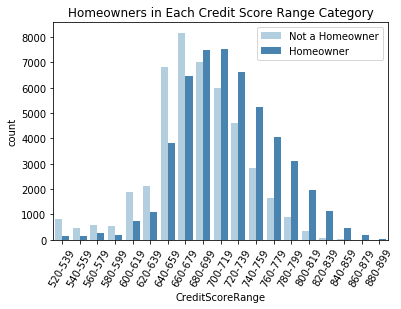

In [68]:
# Compare homeowner status to credit score range
sb.countplot(data = df_clean, x = 'CreditScoreRange', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = csrange_order)
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
plt.xticks(rotation = 60)
plt.title('Homeowners in Each Credit Score Range Category');

Very insightful findings that show how higher credit scores are strongly related to being a homeowner.  Likewise, the higher the income the more likely being a homeowner.  Again, it makes sense when there is consistency and structure in one's living circumstance.

Finally, I will take a deeper look at some scatter plots viewed earlier.  Particularly, I would like to compare the relationships between 1. loan amounts and monthly loan payments, 2. monthly income and monthly loan payments, and 3. employment duration and monthly income.

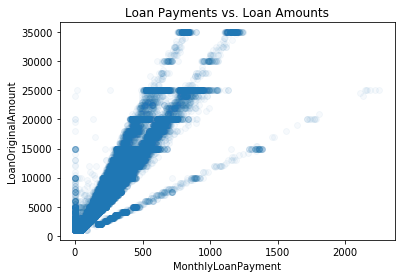

In [69]:
# Compare the relationship between loan original amounts and monthly loan payments
sb.regplot(data = df_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',fit_reg = False, x_jitter = 0.3, scatter_kws = {'alpha': 1/25})
plt.title('Loan Payments vs. Loan Amounts');

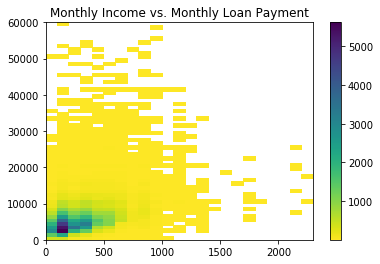

In [70]:
# Compare the relationship between stated montly income and monthly loan payments
bins_x = np.arange(0, df_clean['MonthlyLoanPayment'].max()+100, 100)
bins_y = np.arange(0, 60000+1000, 1000)
plt.hist2d(data = df_clean, x = 'MonthlyLoanPayment', y = 'StatedMonthlyIncome', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.title('Monthly Income vs. Monthly Loan Payment')
plt.colorbar();

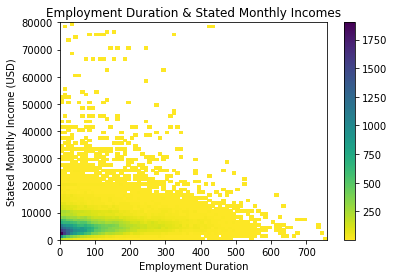

In [71]:
# Compare the relationship between stated monthly income and employment duration
bins_x = np.arange(0, df_clean['EmploymentStatusDuration'].max()+10, 10)
bins_y = np.arange(0, 80000+1000, 1000)
plt.hist2d(data = df_clean, x = 'EmploymentStatusDuration', y = 'StatedMonthlyIncome', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.title('Employment Duration & Stated Monthly Incomes')
plt.xlabel('Employment Duration')
plt.ylabel('Stated Monthly Income (USD)')
plt.colorbar();

With the information I discovered, I don't necessarily think that long term employment is the most beneficial.  Working into newer positions with higher pay more frequently seems to be the better way to go!  There is a linear relationship between loan amounts and monthly loan payments.  This should be obvious.  Stated monthly income ranges mostly between 0 and 20K and monthly loan payments are mostly between 0 and 1K.  Employment status ranges to as long as 60 years or more.  That is a long time in one company or position.  

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

There has been a lot of eploration so far.  I think that I appreciate the relationships between owning a home and credit scores, income range, and loan amounts.  It gives me hope that if I am diligent and smart with my purchases young in life, then I can have more later.  We did see some strong correlations between loan amounts and monthly loan payments.  The box and violin plots allowed me to see how loans compare across states, listing categores and ranges.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I think I may be trying to view too many features for this project and my limited experience.  I do like playing around with the different plots.  Now onto mulivariate exploration.

## Multivariate Exploration

I want to truly understand if those that make more money are better off financially with less debt ratios, smaller loans, and are homeowners.  To explore these questions I will look at (1) homeowners compared to debt ratio and loan amount relationships, (2) homeowners within credit score ranges given a debt ratio, (3) term lengths within credit score ranges given loan amounts, and (4) income ranges containing the relationship between debt to income ratio and loan amounts.

C:\Users\bowld\Documents\Udacity\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


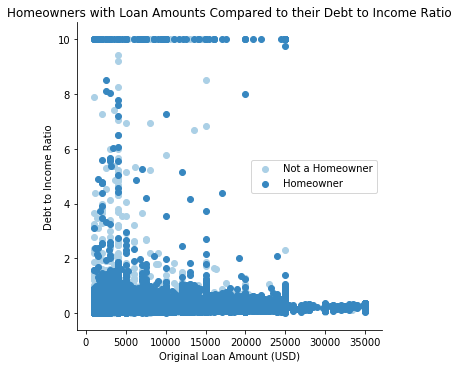

In [72]:
# Create a plot to compare loan amount with debt to income ratios for homeowners
g = sb.FacetGrid(data = df_clean, hue = 'IsBorrowerHomeowner', palette = 'Blues', size = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'DebtToIncomeRatio')
l = plt.legend(loc = 5)
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
g.set_xlabels('Original Loan Amount (USD)')
g.set_ylabels('Debt to Income Ratio')
plt.title('Homeowners with Loan Amounts Compared to their Debt to Income Ratio');

From this plot we can see that homeowners and non-homeowners alike have a majority or a debt to income ratio lower than one.  However, there does seem to be a higher debt to income ratio with more non-homeowners than homeowners.  Certainly not a large difference, but a slight one.  Now I would like to look at income range with debt to income ratio for homeowners and non-homeowners.  I will try a pointplot for this one.

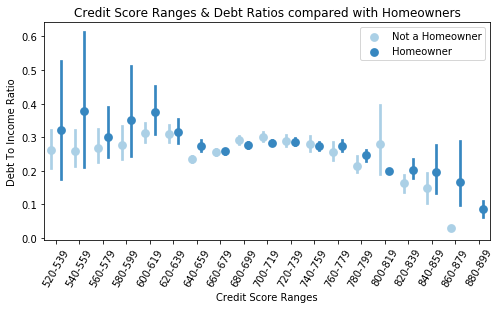

In [73]:
# Create a pointplot for homeowners, credit score range, and debt to income ratio
fig = plt.figure(figsize = [8,4])
ax = sb.pointplot(data = df_clean, x = 'CreditScoreRange', y = 'DebtToIncomeRatio', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Credit Score Ranges & Debt Ratios compared with Homeowners')
plt.xlabel('Credit Score Ranges')
plt.ylabel('Debt To Income Ratio')
l = plt.legend()
l.get_texts()[0].set_text('Not a Homeowner')
l.get_texts()[1].set_text('Homeowner')
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 60)
plt.show();

This is a very enlightening plot.  It is so interesting that those with low or high credit scores have greater error or uncertanty for debt to income ratios.  The middle range of credit scores is highly accurate.  Moreover, homeowners are fewer in the low or high credit score ranges.  We can interpret that the majority of borrowers have a credit score range somewhere between 640 and 800.  We can also interpret that same majority to have a debt to income ratio between 0.2 and 0.3.  This is promising for me as a homeowner!

This next plot is similar to the previous one but with a look at income ranges with debt ratios for the three term lengths of the loans.

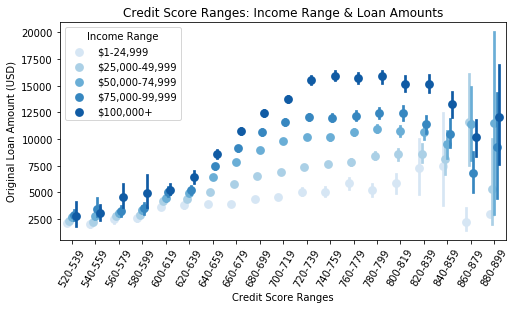

In [87]:
# Create a pointplot for income range within credit score ranges given loan amounts
fig = plt.figure(figsize = [8,4])
df_sub = df_clean.loc[df_clean['IncomeRange'].isin(['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])]
order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ax = sb.pointplot(data = df_sub, x = 'CreditScoreRange', y = 'LoanOriginalAmount', hue = 'IncomeRange', hue_order = order,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Credit Score Ranges: Income Range & Loan Amounts')
plt.xlabel('Credit Score Ranges')
plt.ylabel('Original Loan Amount (USD)')
plt.xticks(rotation = 60)
plt.legend(title = 'Income Range')
plt.show();

This is a very interesting point plot because it shows an increase in loan amounts as individuals earn more money.  It makes sense that those who earn more money have higher credit scores, but not why they would need to borrow more money.  An interesting part is also the credit score ranges.  There appears to be fewer loans when credit score ranges exceed 820.

The final plot I want to do is compare stated monthly income with debt ratios for homeowners and non-homeowners.

C:\Users\bowld\Documents\Udacity\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


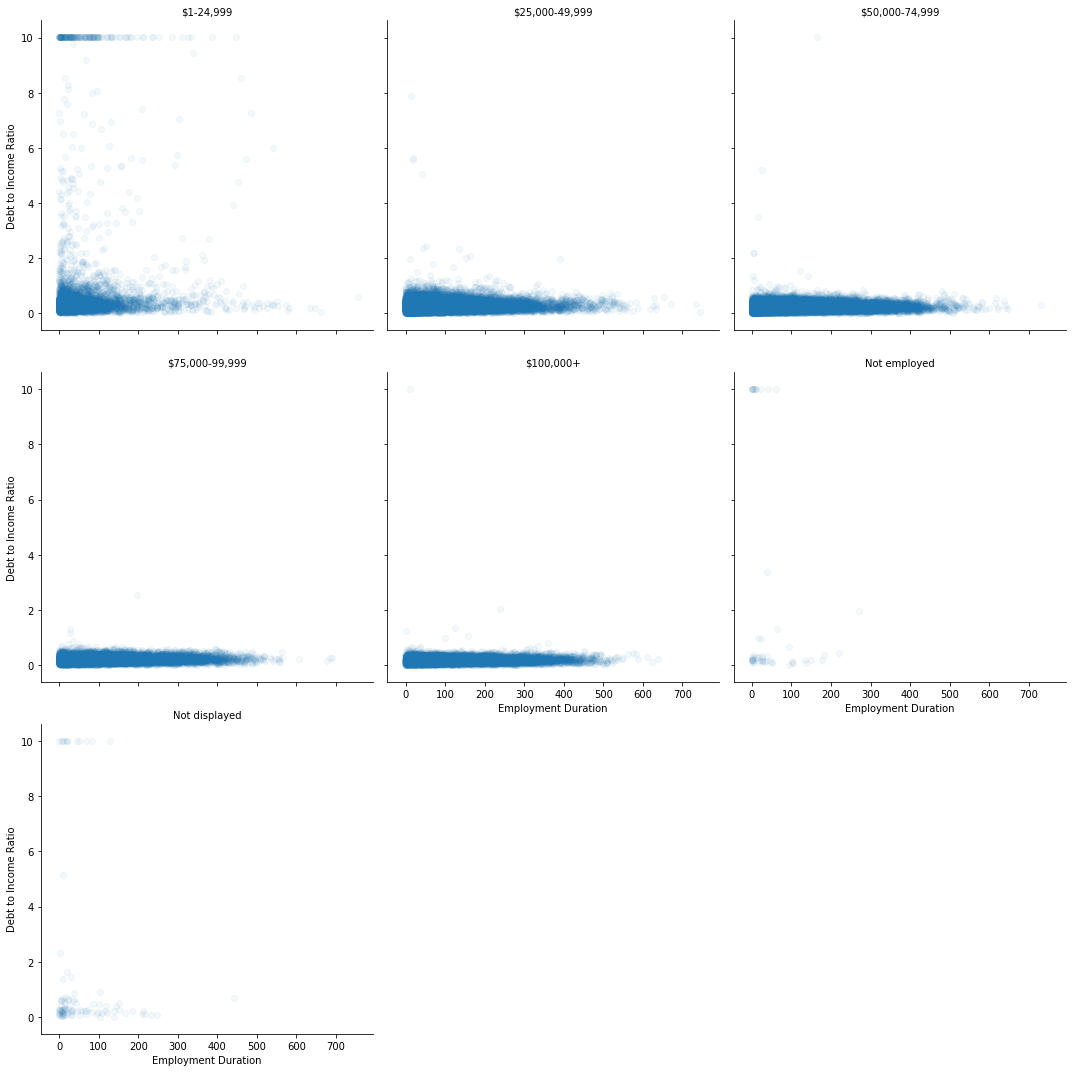

In [75]:
# Create a facetgrid for income ranges, loan amounts and debt to income ratios
g = sb.FacetGrid(data = df_clean, col = 'IncomeRange', size = 5, col_wrap = 3, col_order = inrange_order)
g.map(sb.regplot, 'EmploymentStatusDuration', 'DebtToIncomeRatio', x_jitter = 0.5, fit_reg = False, scatter_kws = {'alpha': 1/20})
g.set_xlabels('Employment Duration')
g.set_ylabels('Debt to Income Ratio')
g.set_titles('{col_name}');

The lowest income range has a much higher chance of having a debt to income ratio greater than one.  However, I would like to zoom in on the range of debt to income ratios from 0 to 1.

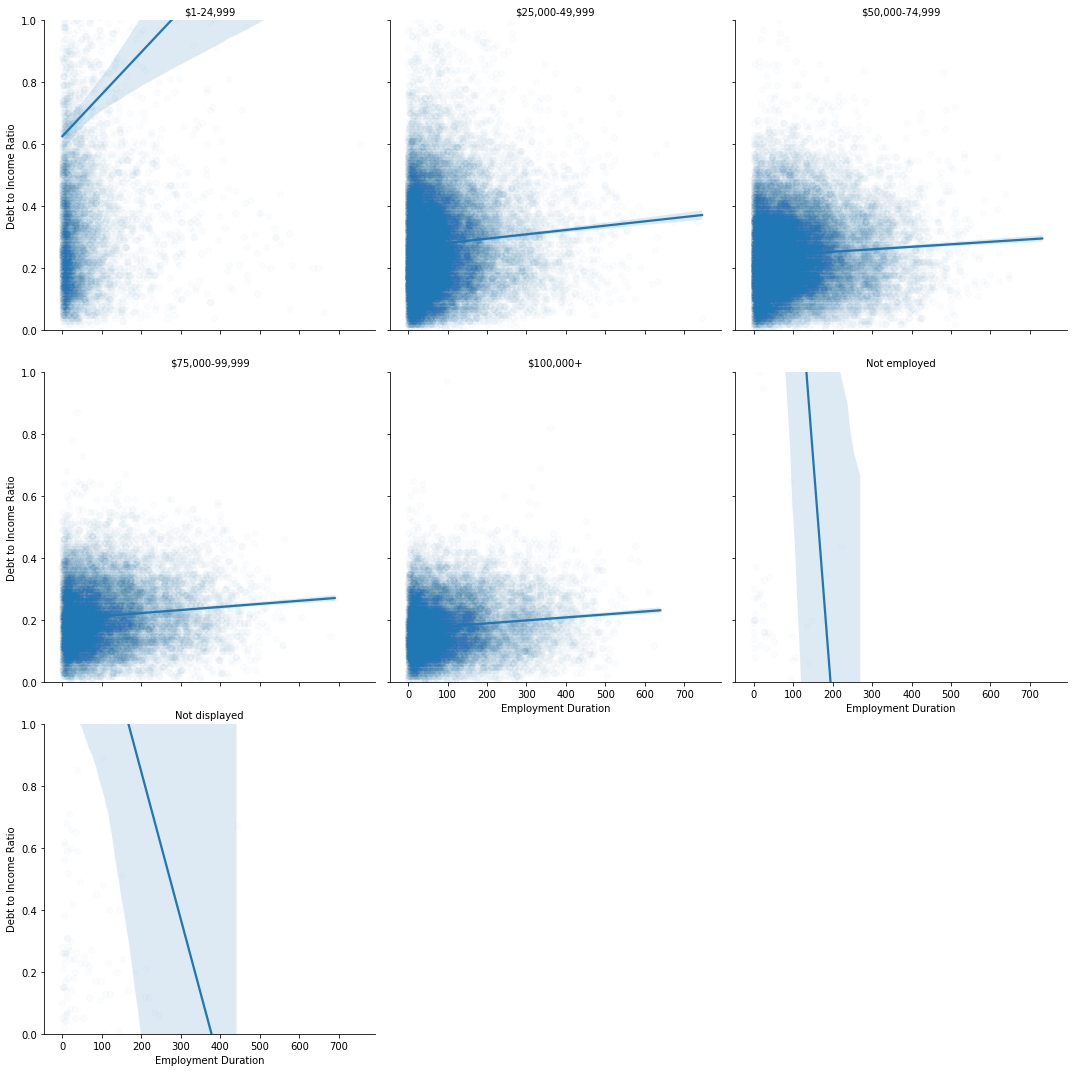

In [76]:
# Modify facetgrid 
g = sb.FacetGrid(data = df_clean, col = 'IncomeRange', size = 5, col_wrap = 3, col_order = inrange_order)
g.map(sb.regplot, 'EmploymentStatusDuration', 'DebtToIncomeRatio', x_jitter = 0.5, scatter_kws = {'alpha': 1/50})
g.set_xlabels('Employment Duration')
g.set_ylabels('Debt to Income Ratio')
plt.ylim(0,1)
g.set_titles('{col_name}');

This FacetGrid gives us a clearer look at the information that the higher two income ranges (i.e., `$75,000-99,999` and `$100,000+`) have very few debt ratios greater than 0.6 and stays within that range over employment duration.  The lower income ranges have debt ratios dispersed from 0 to 1, with the majority less than 0.8 and empployment durations shorter.  It is more likely to see debt ratios greater than 1 the lower the income range and shorter the employment as shown above. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your features of interest?

I did a great deal of exploring in this project but the points and relationships that I would like to report on are this:

1. Homeowners seem to have less debt to income ratio as compared to non-homeowners.
2. There is a much greater chance of having a higher debt to income ratio with a low income. 
3. The higher the credit score range, the lower the debt to income ratio.
4. There is a correlation between credit score range and income range for loan amounts.  Those who have higher incomes also have higher credit scores and borrow larger sums of money.
5. Finally, the income ranges revealed a linear regression between employment status durations and debt to income ratios.  The lowest range had the greater slope, followed by each consecutive income range.  The greater two income ranges are relatively the same.  However, both 'Not-employed' and 'Not displayed' revealed a negative correlation.

I think debt to income ratio strengthened other features, such as employment and income.  I think comparing homeowners and non-homeowners was an interesting comparison.  I think I could have gone several directions with this exploration and found insightful features of interest.

### Were there any interesting or surprising interactions between features?

I was probably most interested in the pointplots with regards to the credit score ranges.  I thought it was interesting to see the same curve or increase with regards to the term lengths and loan amounts.  I was also surprised to see such error bars on the plot with homeowners and debt to income ratio for each credit score range.  It makes sense that the majority of individuals would be within the credit range of 640 and 800.  What is interesting to me is the large range or individuals with debt ratios and low or high credit scores.  

I could spend a great deal more time on exploring this data!  There are so many visualizations to utilize.  I kept my plots to base color palettes, but it would be fun to explore more.  I am also interested in exploring the numerous depth and shapes with regards to scatterplots and 2d histograms.  

### References
* https://github.com/jmlcode/p4-prosper-loan-data-visualization
* file:///C:/Users/bowld/AppData/Local/Temp/Temp1_communicate-data-example-project%20(1).zip/Example%20Project/Example_Project_Diamonds_Part1.html
* https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
* https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
* https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text#:~:text=You%20need%20to%20gain%20access%20of%20the%20legend,plt.plot%28range%281%2C11%29%2C%20label%3D%27Short%20label%27%29%20L%3Dplt.legend%28%29%20L.get_texts%28%29.set_text%28%27make%20it%20short%27%29%20plt.savefig%28%27temp.png%27%29
* https://scientificallysound.org/2016/06/09/matplotlib-how-to-plot-subplots-of-unequal-sizes/